<a id = '5.5'></a>
<p style = "font-size : 25px; color : #34656d ; font-family : 'Comic Sans MS'; text-align : center; background-color : #fbc6a4; border-radius: 5px 5px;"><strong>Road Traffic Accidents Severity Classification</strong></p>



![](road_traffic.jpg)

**🧾Description:**
This data set is collected from Addis Ababa Sub-city police departments for master's research work. The data set has been prepared from manual records of road traffic accidents of the year 2017-20. All the sensitive information has been excluded during data encoding and finally it has 32 features and 12316 instances of the accident. Then it is preprocessed and for identification of major causes of the accident by analyzing it using different machine learning classification algorithms. 


🧭 **Problem Statement:**
The target feature is Accident_severity which is a multi-class variable. The task is to classify this variable based on the other 31 features step-by-step by going through each day's task. Your metric for evaluation will be f1-score

💻**Source of Dataset** : [NARCIS Addis Ababa Govt Agency](https://www.narcis.nl/dataset/RecordID/oai%3Aeasy.dans.knaw.nl%3Aeasy-dataset%3A191591)

<a id = '5.5'></a>
<p style = "font-size : 25px; color : #34656d ; font-family : 'Comic Sans MS'; text-align : center; background-color : #fbc6a4; border-radius: 5px 5px;"><strong>Approach</strong></p>

**Contents**
1. Preliminary Analysis
2. Exploratory Data Analysis and Visualization

<a id = '5.5'></a>
<p style = "font-size : 25px; color : #34656d ; font-family : 'Comic Sans MS'; text-align : center; background-color : #fbc6a4; border-radius: 5px 5px;"><strong>Preliminary Analysis</strong></p>

**Load The Libraries**

In [6]:
from IPython.display import Image
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

**Load the Dataset**

In [160]:
missing_values = ['na','NaN']
df = pd.read_csv('dataset.csv',na_values = missing_values)

**How many records and features are in the dataset?**

In [9]:
df.shape

(12316, 32)

**Let's have a glimpse of the dataset**

In [10]:
df.head()

,Time,Day_of_week,Age_band_of_driver,Sex_of_driver,Educational_level,Vehicle_driver_relation,Driving_experience,Type_of_vehicle,Owner_of_vehicle,Service_year_of_vehicle,...,Vehicle_movement,Casualty_class,Sex_of_casualty,Age_band_of_casualty,Casualty_severity,Work_of_casuality,Fitness_of_casuality,Pedestrian_movement,Cause_of_accident,Accident_severity
0,17:02:00,Monday,18-30,Male,Above high school,Employee,1-2yr,Automobile,Owner,Above 10yr,...,Going straight,na,na,na,na,NaN,NaN,Not a Pedestrian,Moving Backward,Slight Injury
1,17:02:00,Monday,31-50,Male,Junior high school,Employee,Above 10yr,Public (> 45 seats),Owner,5-10yrs,...,Going straight,na,na,na,na,NaN,NaN,Not a Pedestrian,Overtaking,Slight Injury
2,17:02:00,Monday,18-30,Male,Junior high school,Employee,1-2yr,Lorry (41?100Q),Owner,NaN,...,Going straight,Driver or rider,Male,31-50,3,Driver,NaN,Not a Pedestrian,Changing lane to the left,Serious Injury
3,1:06:00,Sunday,18-30,Male,Junior high school,Employee,5-10yr,Public (> 45 seats),Governmental,NaN,...,Going straight,Pedestrian,Female,18-30,3,Driver,Normal,Not a Pedestrian,Changing lane to the right,Slight Injury
4,1:06:00,Sunday,18-30,Male,Junior high school,Employee,2-5yr,NaN,Owner,5-10yrs,...,Going straight,na,na,na,na,NaN,NaN,Not a Pedestrian,Overtaking,Slight Injury


**What are the features of the dataset?**

In [11]:
df.columns

Index(['Time', 'Day_of_week', 'Age_band_of_driver', 'Sex_of_driver',
       'Educational_level', 'Vehicle_driver_relation', 'Driving_experience',
       'Type_of_vehicle', 'Owner_of_vehicle', 'Service_year_of_vehicle',
       'Defect_of_vehicle', 'Area_accident_occured', 'Lanes_or_Medians',
       'Road_allignment', 'Types_of_Junction', 'Road_surface_type',
       'Road_surface_conditions', 'Light_conditions', 'Weather_conditions',
       'Type_of_collision', 'Number_of_vehicles_involved',
       'Number_of_casualties', 'Vehicle_movement', 'Casualty_class',
       'Sex_of_casualty', 'Age_band_of_casualty', 'Casualty_severity',
       'Work_of_casuality', 'Fitness_of_casuality', 'Pedestrian_movement',
       'Cause_of_accident', 'Accident_severity'],
      dtype='object')

**What do the features mean?**

- time : time of the accident
- day_of_week : the day in which accident took place
- age_band_of_driver : the age bracket of the driver
- sex_of_driver : gender of the driver involved
- driving_experience : how experienced was the driver
- type of vehicle : what type of vehicle was involved
- owner of vehicle : who owned the vehicle?
- type_of_junction : what was the tpye of junction(Y-junction/T-Junction/U Turn/O-Junction)
- road_surface_type : what was the type of road(asphalt/gravel)
- accident_severity : what is the level of severity of the particular accident

**Are all the features numberic?**

In [13]:
df.dtypes

Time                           object
Day_of_week                    object
Age_band_of_driver             object
Sex_of_driver                  object
Educational_level              object
Vehicle_driver_relation        object
Driving_experience             object
Type_of_vehicle                object
Owner_of_vehicle               object
Service_year_of_vehicle        object
Defect_of_vehicle              object
Area_accident_occured          object
Lanes_or_Medians               object
Road_allignment                object
Types_of_Junction              object
Road_surface_type              object
Road_surface_conditions        object
Light_conditions               object
Weather_conditions             object
Type_of_collision              object
Number_of_vehicles_involved     int64
Number_of_casualties            int64
Vehicle_movement               object
Casualty_class                 object
Sex_of_casualty                object
Age_band_of_casualty           object
Casualty_sev

We observe the there are only **Two Numerical Features:**
- Number_of_vehicles_involved
- Number_of_causalities

All the other **30 columns are Categorical in nature**

**Let's have a look at summary statistics of the dataset**

In [14]:
df.describe()

,Number_of_vehicles_involved,Number_of_casualties
count,12316.000000,12316.000000
mean,2.040679,1.548149
std,0.688790,1.007179
min,1.000000,1.000000
25%,2.000000,1.000000
50%,2.000000,1.000000
75%,2.000000,2.000000
max,7.000000,8.000000


**Observations :** 

On an average the *number of vehicles involved is 2* and the *number of causalities is 1*

The *maximum number of causalities is 7* and the *maximum number of vehicles involved is 8*

**Statistical Data of Categorical Features**

In [77]:
df.describe(exclude="int64")

,Time,Day_of_week,Age_band_of_driver,Sex_of_driver,Educational_level,Vehicle_driver_relation,Driving_experience,Type_of_vehicle,Owner_of_vehicle,Service_year_of_vehicle,...,Vehicle_movement,Casualty_class,Sex_of_casualty,Age_band_of_casualty,Casualty_severity,Work_of_casuality,Fitness_of_casuality,Pedestrian_movement,Cause_of_accident,Accident_severity
count,12316,12316,12316,12316,11575,11737,11487,11366,11834,8388,...,12008,12316,12316,12316,12316,9118,9681,12316,12316,12316
unique,1074,7,5,3,7,4,7,17,4,6,...,13,4,3,6,4,7,5,9,20,3
top,15:30:00,Friday,18-30,Male,Junior high school,Employee,5-10yr,Automobile,Owner,Unknown,...,Going straight,Driver or rider,Male,na,3,Driver,Normal,Not a Pedestrian,No distancing,Slight Injury
freq,120,2041,4271,11437,7619,9627,3363,3205,10459,2883,...,8158,4944,5253,4443,7076,5903,9608,11390,2263,10415


**Short Glimpse of Missing Data Records**

**Columns with Missing values**

In [71]:
df.isnull().any()

Time                           False
Day_of_week                    False
Age_band_of_driver             False
Sex_of_driver                  False
Educational_level               True
Vehicle_driver_relation         True
Driving_experience              True
Type_of_vehicle                 True
Owner_of_vehicle                True
Service_year_of_vehicle         True
Defect_of_vehicle               True
Area_accident_occured           True
Lanes_or_Medians                True
Road_allignment                 True
Types_of_Junction               True
Road_surface_type               True
Road_surface_conditions        False
Light_conditions               False
Weather_conditions             False
Type_of_collision               True
Number_of_vehicles_involved    False
Number_of_casualties           False
Vehicle_movement                True
Casualty_class                 False
Sex_of_casualty                False
Age_band_of_casualty           False
Casualty_severity              False
W

In [15]:
df.isnull().sum()

Time                              0
Day_of_week                       0
Age_band_of_driver                0
Sex_of_driver                     0
Educational_level               741
Vehicle_driver_relation         579
Driving_experience              829
Type_of_vehicle                 950
Owner_of_vehicle                482
Service_year_of_vehicle        3928
Defect_of_vehicle              4427
Area_accident_occured           239
Lanes_or_Medians                385
Road_allignment                 142
Types_of_Junction               887
Road_surface_type               172
Road_surface_conditions           0
Light_conditions                  0
Weather_conditions                0
Type_of_collision               155
Number_of_vehicles_involved       0
Number_of_casualties              0
Vehicle_movement                308
Casualty_class                    0
Sex_of_casualty                   0
Age_band_of_casualty              0
Casualty_severity                 0
Work_of_casuality           

`Defect_of_vehicle` has the highest number of missing values

In [25]:
percent_missing = df.isnull().sum() * 100 / len(df)
missing_value_df = pd.DataFrame({'column_name': df.columns,
                                 'percent_missing': percent_missing})
missing_value_df = missing_value_df.reset_index()

In [28]:
missing_value_df.drop('index',axis = 1,inplace = True)

In [30]:
missing_value_df.sort_values(by = 'percent_missing',ascending = False,inplace= True)

**What are the features with maximum missing values?**

In [31]:
missing_value_df.head()

,column_name,percent_missing
10,Defect_of_vehicle,35.945112
9,Service_year_of_vehicle,31.893472
27,Work_of_casuality,25.966223
28,Fitness_of_casuality,21.394933
7,Type_of_vehicle,7.713543


`Defect_of_vehicle`and `Service_year_of_vehicle` have the highest percentage of missing values

**Are there any duplicates in the data?**

In [73]:
df.duplicated().sum()

0

THere are **No duplicate records**

**Are there any possible outliers?**

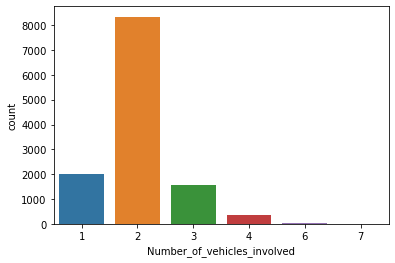

In [33]:
sns.countplot(df['Number_of_vehicles_involved'])

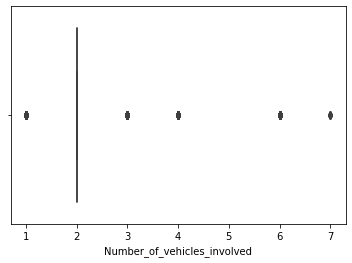

In [32]:
sns.boxplot(x = df['Number_of_vehicles_involved'])

It may seem that there are outliers but it does not give clear picture as in most of the accidents 2 vehicles were involved

In [36]:
df.skew(axis=0)

Number_of_vehicles_involved    1.323454
Number_of_casualties           2.344769
dtype: float64

**For both the numerical features, there is considerable amount of skewness**

**What are the unique classes for the categorical features?**

In [43]:
df_des = df.describe(include='object')
df_des

,Time,Day_of_week,Age_band_of_driver,Sex_of_driver,Educational_level,Vehicle_driver_relation,Driving_experience,Type_of_vehicle,Owner_of_vehicle,Service_year_of_vehicle,...,Vehicle_movement,Casualty_class,Sex_of_casualty,Age_band_of_casualty,Casualty_severity,Work_of_casuality,Fitness_of_casuality,Pedestrian_movement,Cause_of_accident,Accident_severity
count,12316,12316,12316,12316,11575,11737,11487,11366,11834,8388,...,12008,12316,12316,12316,12316,9118,9681,12316,12316,12316
unique,1074,7,5,3,7,4,7,17,4,6,...,13,4,3,6,4,7,5,9,20,3
top,15:30:00,Friday,18-30,Male,Junior high school,Employee,5-10yr,Automobile,Owner,Unknown,...,Going straight,Driver or rider,Male,na,3,Driver,Normal,Not a Pedestrian,No distancing,Slight Injury
freq,120,2041,4271,11437,7619,9627,3363,3205,10459,2883,...,8158,4944,5253,4443,7076,5903,9608,11390,2263,10415


**Cause_of_accident** and **vehicle_movement** have the maximum number of categories at 17 and 20 respectively

Accident_severity is our target feature. How many categories does it have?

In [44]:
df["Accident_severity"].unique()

array(['Slight Injury', 'Serious Injury', 'Fatal injury'], dtype=object)

Accident_severity has three categories : **Slight Injury, Serious Injury and Fatal Injury**

**Splitting the predictors and target**

In [46]:
y = df['Accident_severity']
X = df.drop(['Accident_severity'],axis = 1)

In [49]:
X.head(1)

,Time,Day_of_week,Age_band_of_driver,Sex_of_driver,Educational_level,Vehicle_driver_relation,Driving_experience,Type_of_vehicle,Owner_of_vehicle,Service_year_of_vehicle,...,Number_of_casualties,Vehicle_movement,Casualty_class,Sex_of_casualty,Age_band_of_casualty,Casualty_severity,Work_of_casuality,Fitness_of_casuality,Pedestrian_movement,Cause_of_accident
0,17:02:00,Monday,18-30,Male,Above high school,Employee,1-2yr,Automobile,Owner,Above 10yr,...,2,Going straight,na,na,na,na,NaN,NaN,Not a Pedestrian,Moving Backward


In [51]:
y.head()

0     Slight Injury
1     Slight Injury
2    Serious Injury
3     Slight Injury
4     Slight Injury
Name: Accident_severity, dtype: object

#### Big Question : Is there any class imbalance?

Let's check using countplot

Slight Injury 10415
Serious Injury 1743
Fatal 158


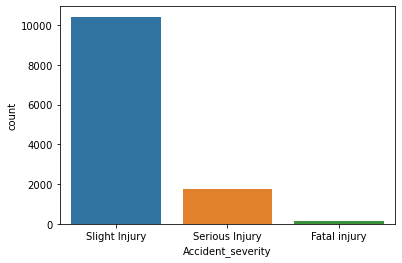

In [52]:
ax = sns.countplot(y,label = 'Count')
Slight_Injury,Serious_Injury,Fatal = y.value_counts()
print("Slight Injury",Slight_Injury)
print("Serious Injury",Serious_Injury)
print("Fatal",Fatal)

We can see that there is class imbalance with over 10k values with `Slight_Injury` class

**Mean Number of Vehicles Involed and Causalities Grouped By Accident_severity**

In [65]:
df_group_by_time = df.groupby('Accident_severity').mean()

In [66]:
df_group_by_time

,Number_of_vehicles_involved,Number_of_casualties
Accident_severity,,
Fatal injury,1.797468,2.341772
Serious Injury,1.895009,1.535284
Slight Injury,2.068747,1.538262


**What is the association between cause_of_accident and the Accident_severity?**

In [70]:
pd.crosstab(df["Accident_severity"],df['Cause_of_accident'])

Cause_of_accident,Changing lane to the left,Changing lane to the right,Driving at high speed,Driving carelessly,Driving to the left,Driving under the influence of drugs,Drunk driving,Getting off the vehicle improperly,Improper parking,Moving Backward,No distancing,No priority to pedestrian,No priority to vehicle,Other,Overloading,Overspeed,Overtaking,Overturning,Turnover,Unknown
Accident_severity,,,,,,,,,,,,,,,,,,,,
Fatal injury,16,23,2,22,4,5,0,3,1,26,20,5,13,7,2,1,4,2,2,0
Serious Injury,206,260,31,209,53,46,3,29,2,162,303,95,149,64,10,15,75,23,6,2
Slight Injury,1251,1525,141,1171,227,289,24,165,22,949,1940,621,1045,385,47,45,351,124,70,23


Most Fatal injuries were caused by **Moving Backward**

Most Serious injuries were caused by **Changing Lane to the right**

Most Slight Injuries were caused by **No Distancing**

<a id = '5.5'></a>
<p style = "font-size : 25px; color : #34656d ; font-family : 'Comic Sans MS'; text-align : center; background-color : #fbc6a4; border-radius: 5px 5px;"><strong>Visualization</strong></p>

<div><p style = "font-size : 25px; color : #34656d ; font-family : 'Comic Sans MS'; text-align : center; background-color : #ADD8E6; border-radius: 2px 2px;"><strong>Working With Numerical Data</strong></p></div>

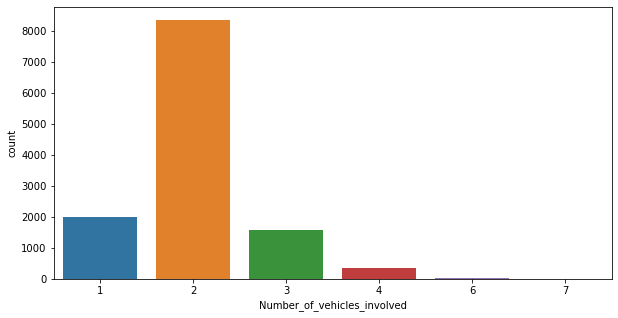

In [81]:
# checking the distribution of 'Number_of_vehicles'
plt.figure(figsize=(10,5))
sns.countplot(data = df, x = df['Number_of_vehicles_involved'])
plt.show()

**Observation** : More than 8k records have 2 vehicles involved

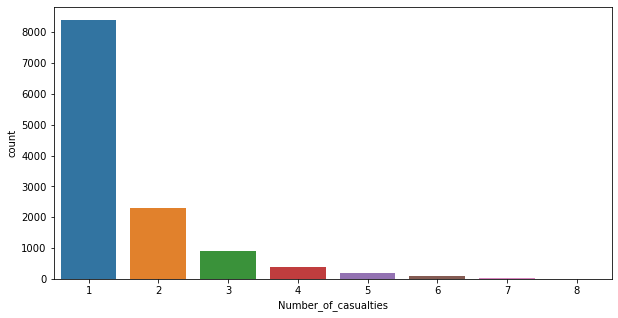

In [84]:
plt.figure(figsize=(10,5))
sns.countplot(data = df, x = df['Number_of_casualties'])
plt.show()

**Observation** : More than 8k records have only 1 casualty

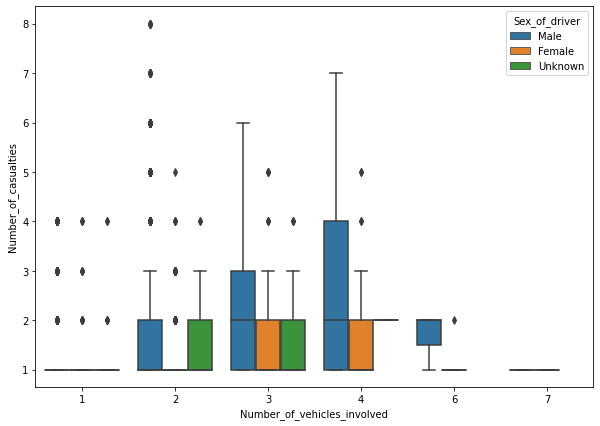

In [95]:
plt.figure(figsize=(10,7))
sns.boxplot(data=df, y='Number_of_casualties', x='Number_of_vehicles_involved',hue = 'Sex_of_driver')
plt.show()

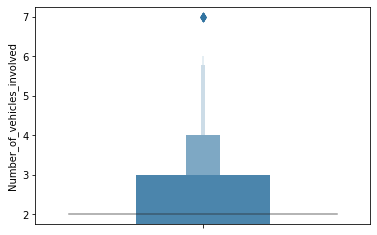

In [92]:
sns.boxenplot(data=df, y='Number_of_vehicles_involved')
plt.show()

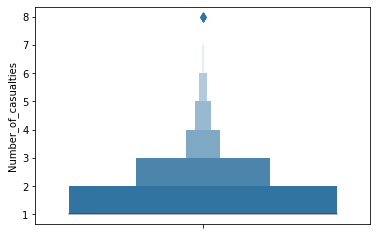

In [93]:
sns.boxenplot(data=df, y='Number_of_casualties')
plt.show()

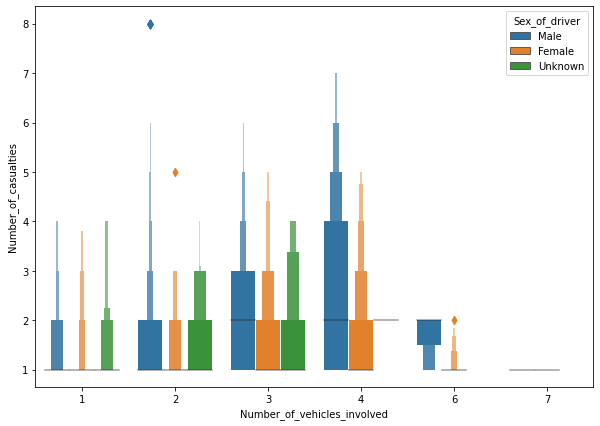

In [96]:
plt.figure(figsize=(10,7))
sns.boxenplot(data=df, y='Number_of_casualties', x='Number_of_vehicles_involved',hue = 'Sex_of_driver')
plt.show()

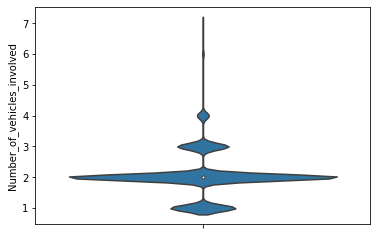

In [98]:
sns.violinplot(data=df, y='Number_of_vehicles_involved')
plt.show()

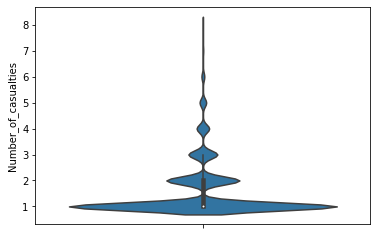

In [103]:
sns.violinplot(data=df, y='Number_of_casualties')
plt.show()

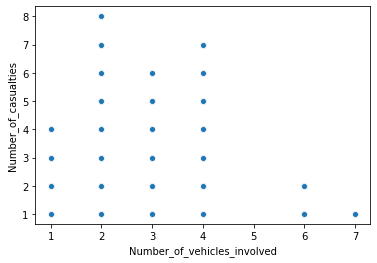

In [105]:
sns.scatterplot(data=df, x='Number_of_vehicles_involved', y='Number_of_casualties')
plt.show()

There is no association between the attributes

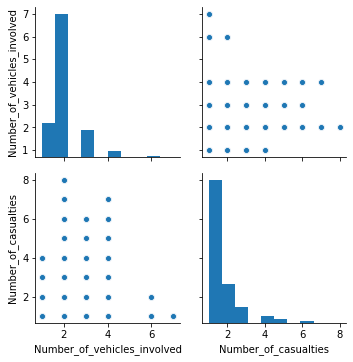

In [140]:
sns.pairplot(data = df)
plt.show()

In [108]:
corr = df.corr()

In [109]:
corr

,Number_of_vehicles_involved,Number_of_casualties
Number_of_vehicles_involved,1.000000,0.213427
Number_of_casualties,0.213427,1.000000


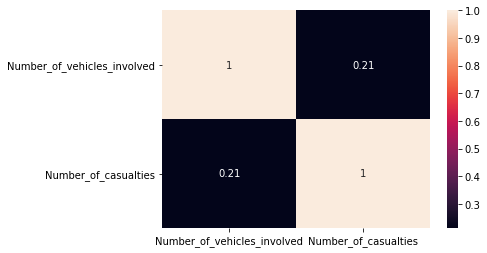

In [110]:
sns.heatmap(corr, annot=True)
plt.show()

**Observation** : There is slight correlation between the `Number_of_vehicles` and `Number_of_casualties` but nothing of significance

<div><p style = "font-size : 25px; color : #34656d ; font-family : 'Comic Sans MS'; text-align : center; background-color : #ADD8E6; border-radius: 2px 2px;"><strong>Working With Categorical Data</strong></p></div>

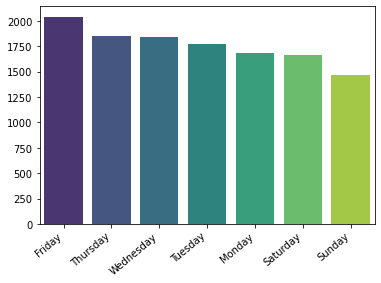

In [138]:
ax = sns.barplot(x=df['Day_of_week'].value_counts().index,
            y=df['Day_of_week'].value_counts().values,palette = "viridis")

ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")

plt.show()

**Observation :** Friday has the most number of accidents

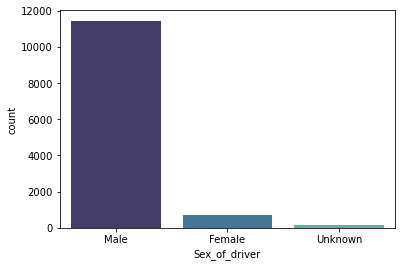

In [136]:
sns.countplot(data=df, x='Sex_of_driver',palette = "mako")
plt.show()

**Observation** : Most of the drivers are Male

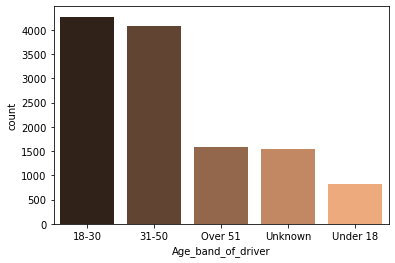

In [135]:
sns.countplot(data=df, x='Age_band_of_driver',order = df['Age_band_of_driver'].value_counts().index,palette = "copper")
plt.show()

**Observation** : Most of the drivers are in age group 18 to 50

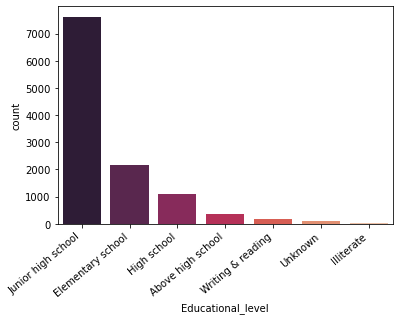

In [132]:
ax = sns.countplot(data=df, x='Educational_level',order = df['Educational_level'].value_counts().index,palette = "rocket")
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")
plt.show()

**Observation** : Over 7000 accidents were caused by `Junior High School` passed drivers

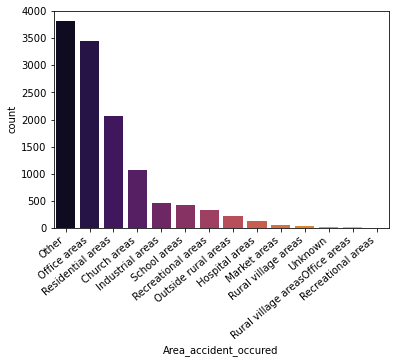

In [131]:
ax = sns.countplot(data=df, x='Area_accident_occured',order = df['Area_accident_occured'].value_counts().index,palette = 'inferno')
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")
plt.show()

C:\Users\Vedanth\anaconda3\lib\site-packages\seaborn\axisgrid.py:723: UserWarning: Using the countplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


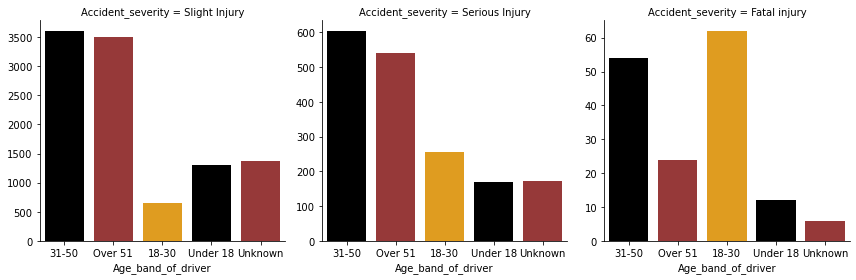

In [130]:
grid = sns.FacetGrid(data=df, col='Accident_severity', height=4, aspect=1, sharey=False)
grid.map(sns.countplot, 'Age_band_of_driver', palette=['black', 'brown', 'orange'])

**Observation** : 

1. Most accidents with slight injuries were caused by drivers in age group 31-51
2. Most serious injuries were caused by drivers in age band of 31-50
3. Most of the fatal injuries were caused by drivers in age band 18-30

<a id = '5.5'></a>
<p style = "font-size : 25px; color : #34656d ; font-family : 'Comic Sans MS'; text-align : center; background-color : #fbc6a4; border-radius: 5px 5px;"><strong>Missing Value Detection and Analysis</strong></p>

### Top Level Statistics Of Missing Values

#### Detecting Missing Values with `missingno` Library

In [141]:
! pip install missingno

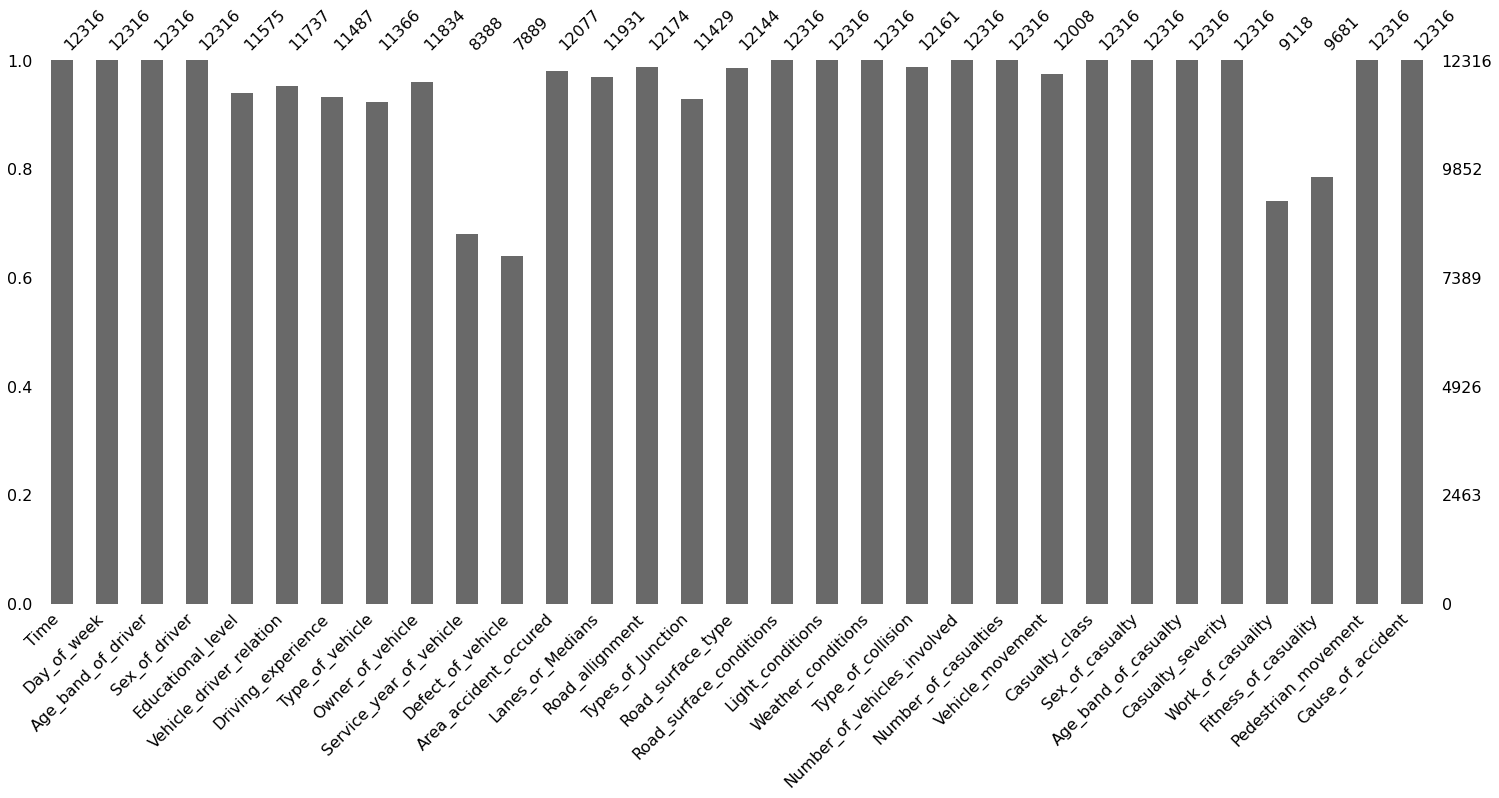

In [143]:
import missingno as msno
msno.bar(X)

`Service_year_of_vehicle` and `Defect_of_vehicle` have maximum missing values

**Where are the missing values**

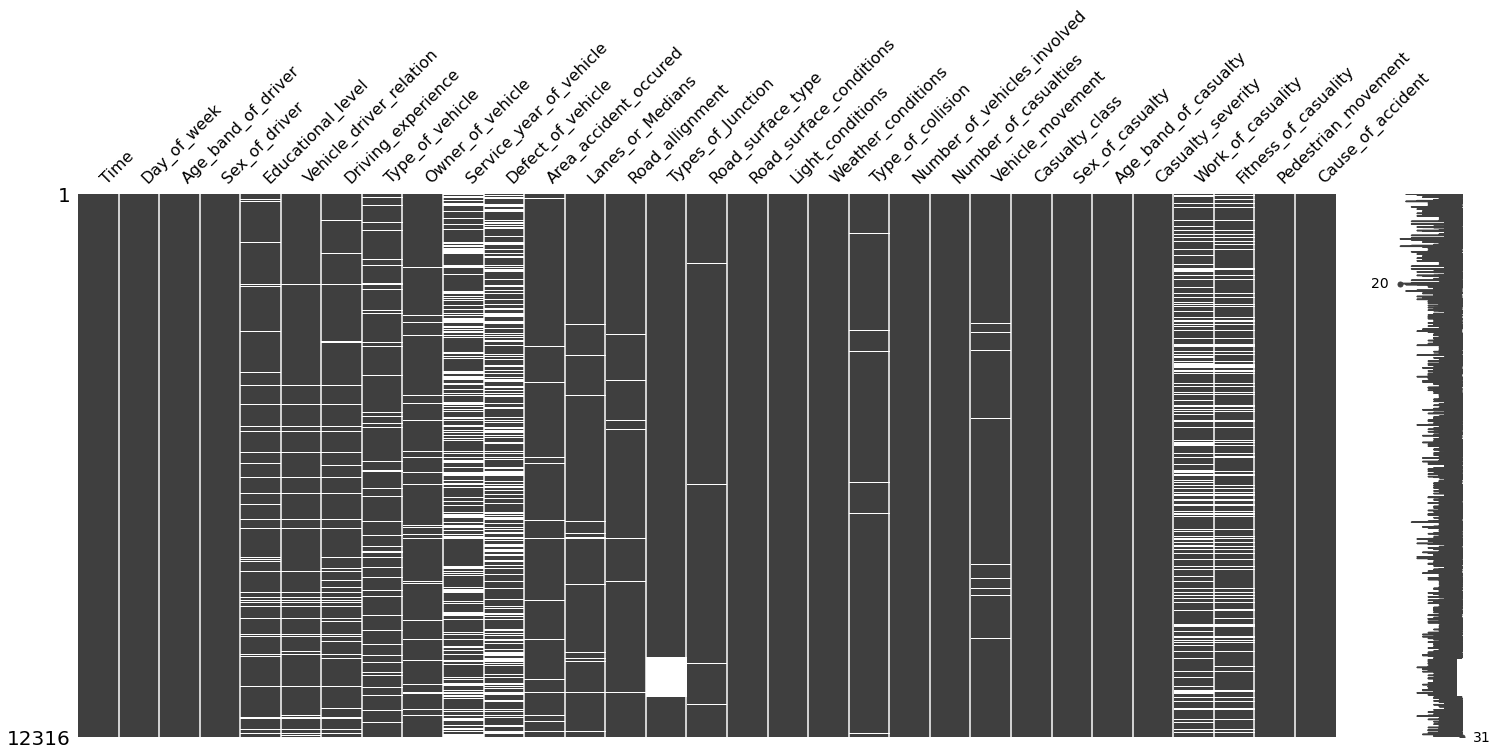

In [144]:
msno.matrix(X)

We can see that `owner_of_vehicle` and `service_year_of_vehicle` have the most missing values whereas `pedestrian_movement` and `cause_of_accident` dont have any missing values visible in the matrix

### Finding reason for missingness with Heatmap

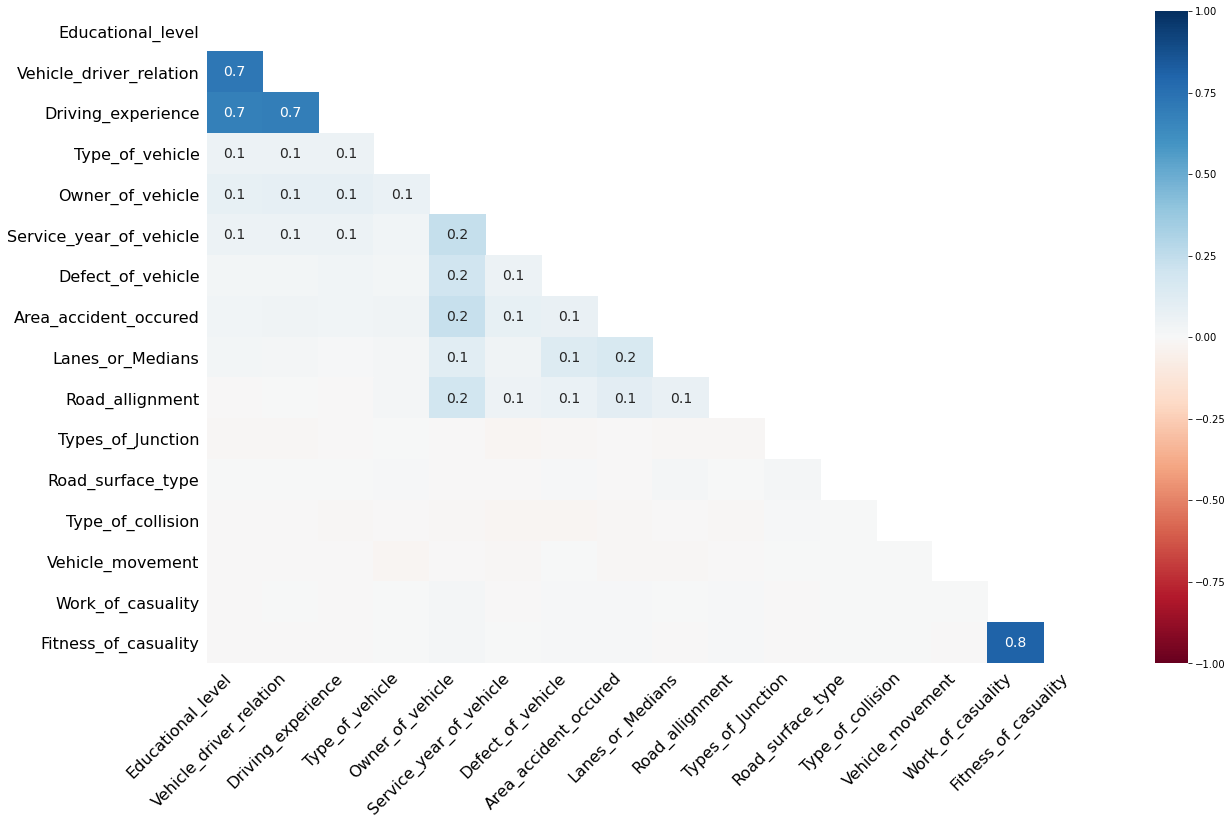

In [145]:
msno.heatmap(X)

**Type of Missing Features Association**

**MNAR** : `Work_of_casulaty` and `firness_of_causalty` , `driving_experience` and `educational_level`

#### Find Missingness with Dendogram

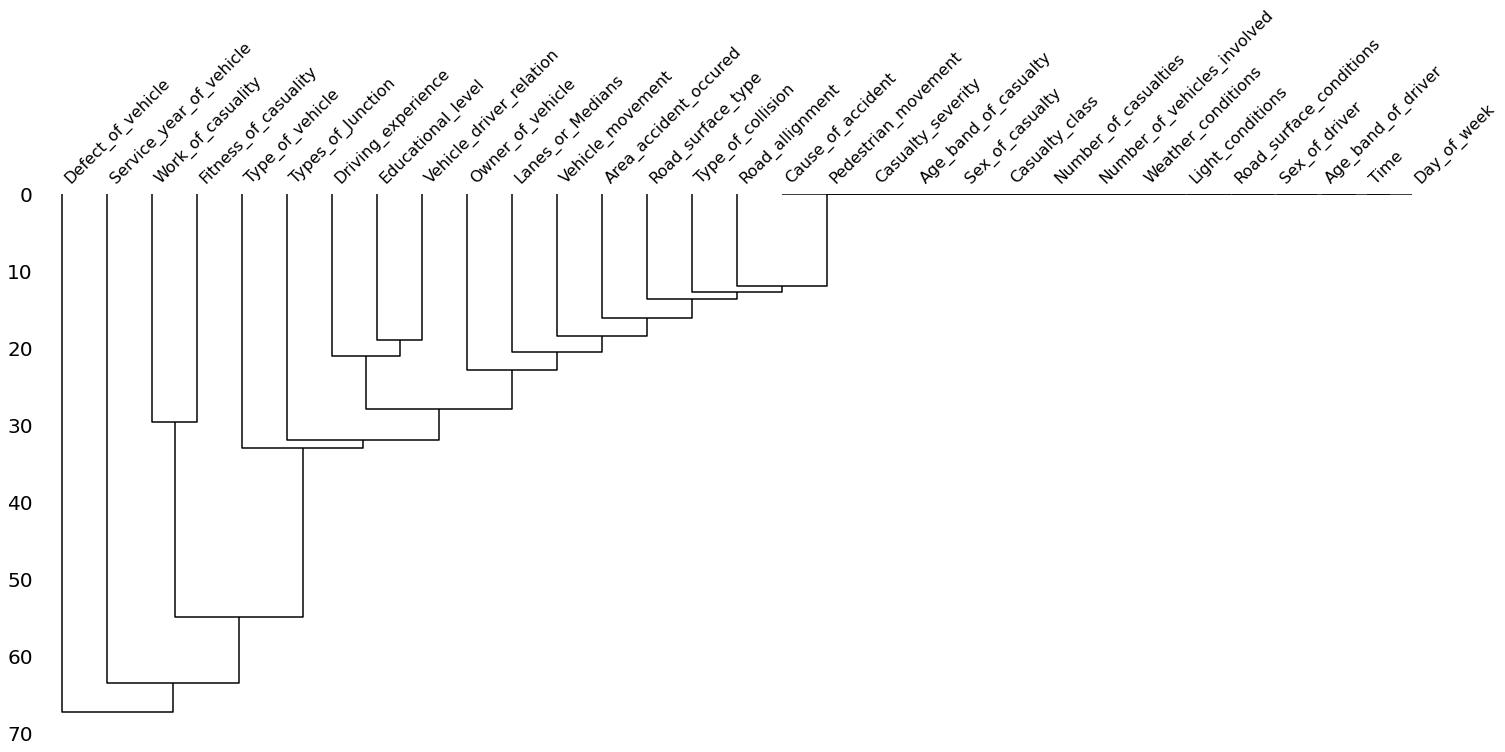

In [148]:
msno.dendrogram(X)

**How to Interpret**

*Cluster leaves which linked together at a distance of zero fully predict one another's presence—one variable might always be empty when another is filled, or they might always both be filled or both empty, and so on(missingno documentation)*

<a id = '5.5'></a>
<p style = "font-size : 25px; color : #34656d ; font-family : 'Comic Sans MS'; text-align : center; background-color : #fbc6a4; border-radius: 5px 5px;"><strong>Treating Missing Values</strong></p>

In [151]:
df.head()

,Time,Day_of_week,Age_band_of_driver,Sex_of_driver,Educational_level,Vehicle_driver_relation,Driving_experience,Type_of_vehicle,Owner_of_vehicle,Service_year_of_vehicle,...,Vehicle_movement,Casualty_class,Sex_of_casualty,Age_band_of_casualty,Casualty_severity,Work_of_casuality,Fitness_of_casuality,Pedestrian_movement,Cause_of_accident,Accident_severity
0,17:02:00,Monday,18-30,Male,Above high school,Employee,1-2yr,Automobile,Owner,Above 10yr,...,Going straight,NaN,NaN,NaN,NaN,NaN,NaN,Not a Pedestrian,Moving Backward,Slight Injury
1,17:02:00,Monday,31-50,Male,Junior high school,Employee,Above 10yr,Public (> 45 seats),Owner,5-10yrs,...,Going straight,NaN,NaN,NaN,NaN,NaN,NaN,Not a Pedestrian,Overtaking,Slight Injury
2,17:02:00,Monday,18-30,Male,Junior high school,Employee,1-2yr,Lorry (41?100Q),Owner,NaN,...,Going straight,Driver or rider,Male,31-50,3.0,Driver,NaN,Not a Pedestrian,Changing lane to the left,Serious Injury
3,1:06:00,Sunday,18-30,Male,Junior high school,Employee,5-10yr,Public (> 45 seats),Governmental,NaN,...,Going straight,Pedestrian,Female,18-30,3.0,Driver,Normal,Not a Pedestrian,Changing lane to the right,Slight Injury
4,1:06:00,Sunday,18-30,Male,Junior high school,Employee,2-5yr,NaN,Owner,5-10yrs,...,Going straight,NaN,NaN,NaN,NaN,NaN,NaN,Not a Pedestrian,Overtaking,Slight Injury


**Splitting Data Into Train and Test Set**

In [152]:
from sklearn.model_selection import train_test_split

In [196]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

**Filling in the missing values with mode of each column**

In [219]:
from sklearn.impute import SimpleImputer

In [220]:
mean_imputer = SimpleImputer(strategy='most_frequent')# strategy can also be mean or median 
X_train.iloc[:,:] = mean_imputer.fit_transform(X_train)

Now let's check if there are any null values...

In [216]:
X_train.isnull().sum()

Time                           0
Day_of_week                    0
Age_band_of_driver             0
Sex_of_driver                  0
Educational_level              0
Vehicle_driver_relation        0
Driving_experience             0
Type_of_vehicle                0
Owner_of_vehicle               0
Service_year_of_vehicle        0
Defect_of_vehicle              0
Area_accident_occured          0
Lanes_or_Medians               0
Road_allignment                0
Types_of_Junction              0
Road_surface_type              0
Road_surface_conditions        0
Light_conditions               0
Weather_conditions             0
Type_of_collision              0
Number_of_vehicles_involved    0
Number_of_casualties           0
Vehicle_movement               0
Casualty_class                 0
Sex_of_casualty                0
Age_band_of_casualty           0
Casualty_severity              0
Work_of_casuality              0
Fitness_of_casuality           0
Pedestrian_movement            0
Cause_of_a

Two columns with most missing values were Defect_of_vehicle and Service_year_of_vehicle, now none of them have null values

In [217]:
X_train['Defect_of_vehicle'].isnull().sum()

0

In [218]:
X_train['Service_year_of_vehicle'].isnull().sum()

0